In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<h3> Cargamos el archivo de distancias generados </h3>

A modo de ejemplo, se trabajará con el conjunto de datos de T50

In [173]:
chan = "localization/NLP/prottrans"

df_distances1 = pd.read_csv("../../results_demo/"+chan+"/Euclidean/distance_estimator.csv")
df_distances2 = pd.read_csv("../../results_demo/"+chan+"/Braycurtis/distance_estimator.csv")
df_distances3 = pd.read_csv("../../results_demo/"+chan+"/Canberra/distance_estimator.csv")
df_distances4 = pd.read_csv("../../results_demo/"+chan+"/Chebyshev/distance_estimator.csv")
df_distances5 = pd.read_csv("../../results_demo/"+chan+"/Cityblock/distance_estimator.csv")
df_distances6 = pd.read_csv("../../results_demo/"+chan+"/Correlation/distance_estimator.csv")
df_distances7 = pd.read_csv("../../results_demo/"+chan+"/Cosine/distance_estimator.csv")
df_distances8 = pd.read_csv("../../results_demo/"+chan+"/Minkowski/distance_estimator.csv")
df_distances9 = pd.read_csv("../../results_demo/"+chan+"/Hamming/distance_estimator.csv")

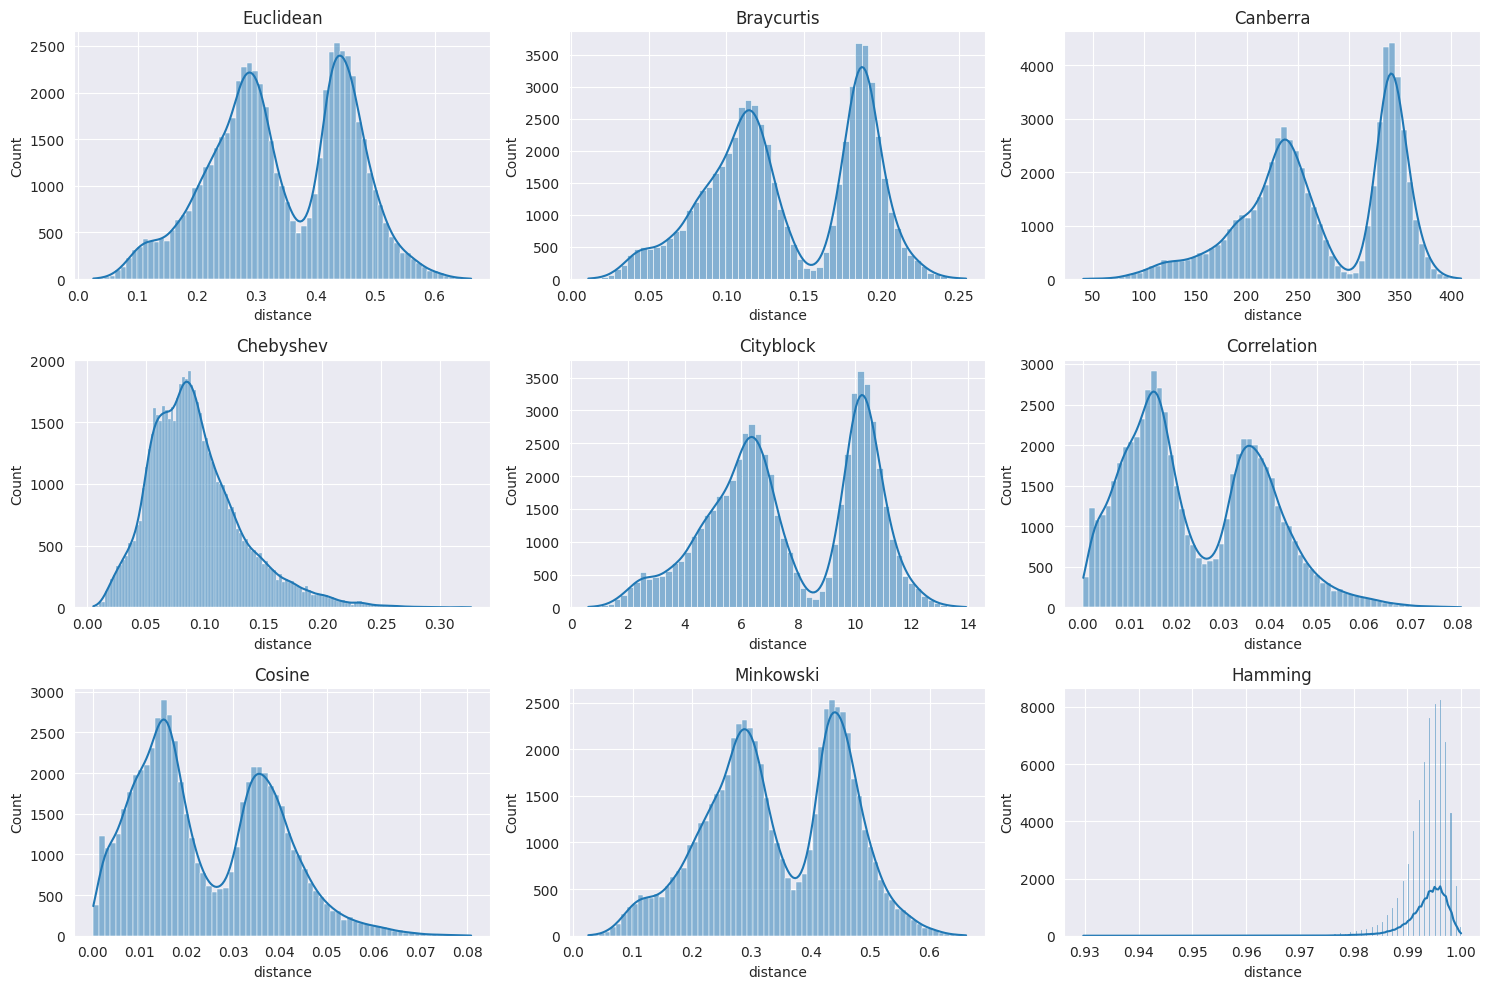

In [174]:
fig, axs = plt.subplots(3,3, figsize=(15,10))

sns.histplot(data=df_distances1, x="distance", kde=True, ax=axs[0,0]).set(title="Euclidean")
sns.histplot(data=df_distances2, x="distance", kde=True, ax=axs[0,1]).set(title="Braycurtis")
sns.histplot(data=df_distances3, x="distance", kde=True, ax=axs[0,2]).set(title="Canberra")
sns.histplot(data=df_distances4, x="distance", kde=True, ax=axs[1,0]).set(title="Chebyshev")
sns.histplot(data=df_distances5, x="distance", kde=True, ax=axs[1,1]).set(title="Cityblock")
sns.histplot(data=df_distances6, x="distance", kde=True, ax=axs[1,2]).set(title="Correlation")
sns.histplot(data=df_distances7, x="distance", kde=True, ax=axs[2,0]).set(title="Cosine")
sns.histplot(data=df_distances8, x="distance", kde=True, ax=axs[2,1]).set(title="Minkowski")
sns.histplot(data=df_distances9, x="distance", kde=True, ax=axs[2,2]).set(title="Hamming")
plt.tight_layout()
plt.show()

- Se tienen las columnas:
  - name_seq1: identificador de secuencia
  - name_seq2: identificador de secuencia
  - peak_seq1: respuesta asociada a secuencia 1
  - peak_seq2: respuesta asociada a secuencia 2
  - distance: distancia euclideana calculada entre las secuencias

In [42]:
df_distances.describe()

,target_seq1,target_seq2,distance
count,67860.000000,67860.000000,67860.000000
mean,51.821456,51.821456,29883.393555
std,5.851787,5.851787,5601.954440
min,36.000000,36.000000,6948.764705
25%,47.900000,47.900000,26205.313375
50%,50.900000,50.900000,29834.634204
75%,55.900000,55.900000,34543.315692
max,64.400000,64.400000,42289.068228


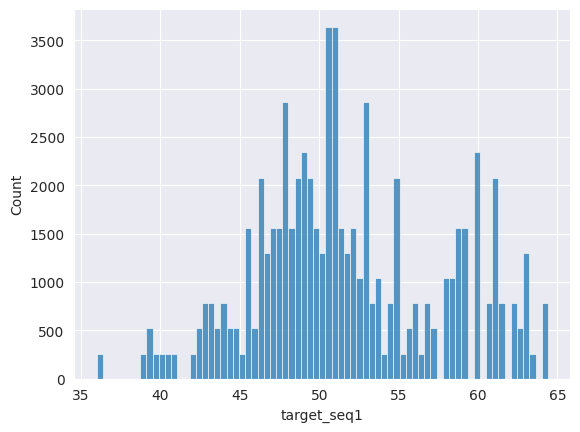

In [43]:
#plotearemos las respuestas, en este caso basta con solo una

sns.histplot(data=df_distances1, x="target_seq1")
plt.show()

<h3> Cosas interesantes </h3>

- Los valores de T50 se asocian a estabilidad térmica
- Los valores menores indican que resisten menos temperatura
- Los valores mayores indican que resisten mayor temperatura
- Este tipo de problemas busca mejorar una actividad, provienen de librerías de diseño racional, evolución dirigida, u otro tipo de técnica experimental para el diseño de variantes mutacionales.

<h3> Revisemos las distancias

432  <h3> Cosas interesantes </h3>

  - Existe una distribución bi modal
  - Puede distinguirse un conjunto de outliers con distancias muy mínimas
  - Es interesante analizar como las distancias se relacionan con las respuestas o diferencias de T50 entre una por sobre otra.
  - Haremos varios experimentos para evaluar si podemos descubrir algunos patrones.

<h3> Haremos una categorización por cuartiles </h3>

Se generarán las siguientes categorías:

- < Q1
- Q1 - Q2
- Q2 - Q3
- \> Q3

In [8]:
q1_dist = np.quantile(df_distances['distance'], .25)
q2_dist = np.quantile(df_distances['distance'], .50)
q3_dist = np.quantile(df_distances['distance'], .75)

categories_distance = []

for index in df_distances.index:
    distance = df_distances['distance'][index]
    if distance > q3_dist:
        categories_distance.append(0)
    elif distance <= q3_dist and distance > q2_dist:
        categories_distance.append(1)
    elif distance <= q2_dist and distance > q1_dist:
        categories_distance.append(2)
    else:
        categories_distance.append(3)

df_distances['distance_cat'] = categories_distance


In [9]:
df_distances

,id_seq1,target_seq1,id_seq2,target_seq2,distance,distance_cat
0,sequence_53082,55.0,sequence_19402,43.0,38663.916973,0
1,sequence_53082,55.0,sequence_20054,49.0,38403.350335,0
2,sequence_53082,55.0,sequence_20048,39.8,37989.963358,0
3,sequence_53082,55.0,sequence_20036,52.9,37428.543420,0
4,sequence_53082,55.0,sequence_19525,48.8,37811.339553,0
...,...,...,...,...,...,...
67855,sequence_19401,47.4,sequence_53056,52.0,19825.366654,3
67856,sequence_19401,47.4,sequence_19347,58.9,16852.986398,3
67857,sequence_19401,47.4,sequence_19379,50.3,10269.414721,3
67858,sequence_19401,47.4,sequence_19348,46.7,27063.790047,2


In [10]:
#considerando que la secuencia sequence_53082 es nuestro target, la tomaremos como base para ver las diferencias si se relacionan con los cambios
df_filter = df_distances.loc[df_distances['id_seq1'] == 'sequence_53082']
df_filter = df_filter.reset_index()

In [11]:
df_filter

,index,id_seq1,target_seq1,id_seq2,target_seq2,distance,distance_cat
0,0,sequence_53082,55.0,sequence_19402,43.0,38663.916973,0
1,1,sequence_53082,55.0,sequence_20054,49.0,38403.350335,0
2,2,sequence_53082,55.0,sequence_20048,39.8,37989.963358,0
3,3,sequence_53082,55.0,sequence_20036,52.9,37428.543420,0
4,4,sequence_53082,55.0,sequence_19525,48.8,37811.339553,0
...,...,...,...,...,...,...,...
255,255,sequence_53082,55.0,sequence_19347,58.9,18487.859618,3
256,256,sequence_53082,55.0,sequence_19379,50.3,22991.467322,3
257,257,sequence_53082,55.0,sequence_19348,46.7,28729.401830,2
258,258,sequence_53082,55.0,sequence_19380,48.1,31517.201981,1


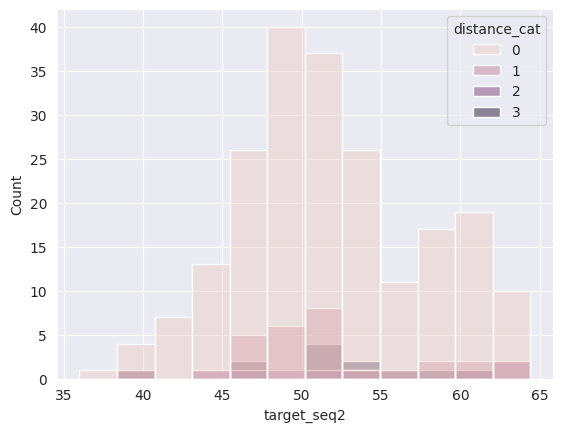

In [12]:
sns.histplot(data=df_filter, x="target_seq2", hue="distance_cat")
plt.show()

In [15]:
#en vez de categorizar distancias, trabajaremos con categorias en las respuestas...
q1_cat = np.quantile(df_filter['target_seq2'], .25)
q2_cat = np.quantile(df_filter['target_seq2'], .50)
q3_cat = np.quantile(df_filter['target_seq2'], .75)

categories_response = []

for index in df_filter.index:
    response = df_filter['target_seq2'][index]
    if response > q3_cat:
        categories_response.append(0)
    elif response <= q3_cat and response > q2_cat:
        categories_response.append(1)
    elif response <= q2_cat and response > q1_cat:
        categories_response.append(2)
    else:
        categories_response.append(3)

df_filter['category_cat'] = categories_response

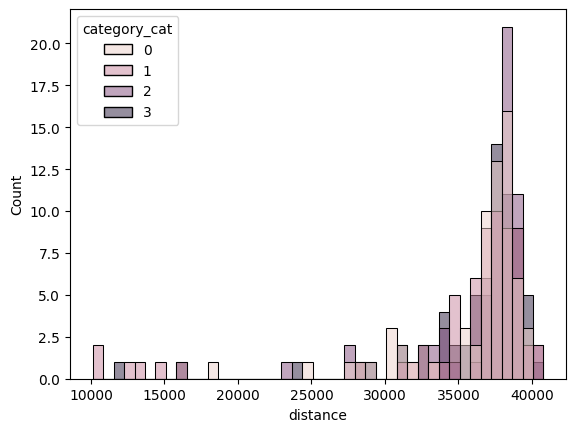

In [16]:
sns.histplot(data=df_filter, x="distance", hue="category_cat")
plt.show()